In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# eval_type = "_unnormalized_sampled"
eval_type = ""

Text(0.5, 1.0, 'TriviaQA (normalized finetuning)')

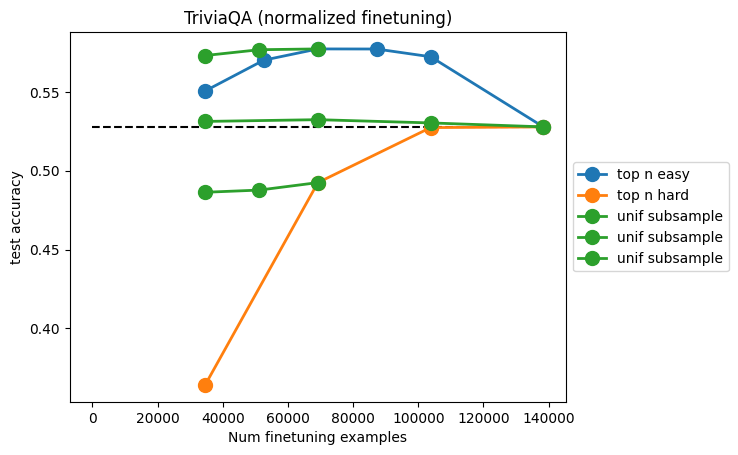

In [11]:
eval_types = ["_sampled"]

for i in range(1):

    eval_type = eval_types[i]
    mode = "hard"
    percentiles = [25, 50, 75]

    checkpoints = ["02000", "10000",  "10000"]


    hard_accuracies = []
    hard_percent_examples = []
    for j in range(len(percentiles)):
        percentile = percentiles[j]
        checkpoint = checkpoints[j]
        try:
            accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/test_answers_correct"+eval_type+".npy")).mean()
            hard_percent_examples.append(percentile)
            hard_accuracies.append(accuracy)
        except:
            print(f"sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}")
        
    mode = "easy"
    percentiles = [25, 37, 50, 62, 75]

    checkpoints = ["10000", "10000", "10000","10000", "10000"]
    # checkpoints = ["02000", "02000", "02000","02000", "02000"]

    easy_accuracies = []
    easy_percent_examples = []
    for j in range(len(percentiles)):
        percentile = percentiles[j]
        checkpoint = checkpoints[j]
        try:
            accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/test_answers_correct"+eval_type+".npy")).mean()
            easy_percent_examples.append(100 - percentile)
            easy_accuracies.append(accuracy)
        except:
            print(f"sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}")




    mode = "unif"
    percentiles = [25, 50, 75]
    checkpoints = ["10000", "10000",  "10000"]
    unif_accuracies = []
    unif_percent_examples = []
    for j in range(len(percentiles)):
        percentile = percentiles[j]
        checkpoint = checkpoints[j]
        try:
            accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/test_answers_correct"+eval_type+".npy")).mean()
            unif_percent_examples.append(percentile)
            unif_accuracies.append(accuracy)
        except:
            print(f"sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}")
    
    mode = "unif"
    percentiles = [25, 37]
    checkpoints = ["10000", "10000",  "10000"]
    easy50_unif_accuracies = []
    easy50_unif_percent_examples = []
    for j in range(len(percentiles)):
        percentile = percentiles[j]
        checkpoint = checkpoints[j]
        try:
            accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_easy50_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/test_answers_correct"+eval_type+".npy")).mean()
            easy50_unif_percent_examples.append(percentile)
            easy50_unif_accuracies.append(accuracy)
        except:
            print(f"sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}")

    mode = "unif"
    percentiles = [25, 37]
    checkpoints = ["10000", "10000",  "10000"]
    hard50_unif_accuracies = []
    hard50_unif_percent_examples = []
    for j in range(len(percentiles)):
        percentile = percentiles[j]
        checkpoint = checkpoints[j]
        try:
            accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_hard50_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/test_answers_correct"+eval_type+".npy")).mean()
            hard50_unif_percent_examples.append(percentile)
            hard50_unif_accuracies.append(accuracy)
        except:
            print(f"sft_triviaqa_llama7B_subsample_{mode}_{str(percentile)}")

    full_accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_10000/hf_model/test_answers_correct"+eval_type+".npy")).mean()

    # if i==0:
    #     # plt.hlines(full_accuracy, 0, 138384, "k", "-")
    #     # plt.plot(np.array([100]+easy_percent_examples)*138384/100, [full_accuracy]+easy_accuracies, "o-", c="C0", label = "top n easy greedy", linewidth=2, markersize=10, alpha=0.5)
    #     # plt.plot(np.array(hard_percent_examples+[100])*138384/100, hard_accuracies+[full_accuracy], "o-", c="C1", label = "top n hard greedy", linewidth=2, markersize=10, alpha=0.5)
    #     pass
    # else:
    plt.hlines(full_accuracy, 0, 138384, "k", "--")
    plt.plot(np.array([100]+easy_percent_examples)*138384/100, [full_accuracy]+easy_accuracies, "o-", c="C0", label = "top n easy", linewidth=2, markersize=10)
    plt.plot(np.array(hard_percent_examples+[100])*138384/100, hard_accuracies+[full_accuracy], "o-", c="C1", label = "top n hard", linewidth=2, markersize=10)
    plt.plot(np.array(unif_percent_examples+[100])*138384/100, unif_accuracies+[full_accuracy], "o-", c="C2", label = "unif subsample", linewidth=2, markersize=10)
    plt.plot(np.array(easy50_unif_percent_examples+[50])*138384/100, easy50_unif_accuracies+[easy_accuracies[2]], "o-", c="C2", label = "unif subsample", linewidth=2, markersize=10)
    plt.plot(np.array(hard50_unif_percent_examples+[50])*138384/100, hard50_unif_accuracies+[hard_accuracies[1]], "o-", c="C2", label = "unif subsample", linewidth=2, markersize=10)


# plt.legend()
# add legend to side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Num finetuning examples")
plt.ylabel("test accuracy")
plt.title("TriviaQA (normalized finetuning)")

In [3]:
    full_accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_10000/hf_model/test_answers_correct"+eval_type+".npy")).mean()


In [4]:
full_accuracy

0.622046366473473

In [41]:
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
data = load_dataset("trivia_qa", "rc.nocontext")

In [57]:
answers = [point["value"] for point in data["train"]["answer"]]

In [61]:
import string
import re

def normalize_answer(s):
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [62]:
normalized_answers = [normalize_answer(answer) for answer in answers]

In [64]:

import editdistance
# editdistance.eval('banana', 'bahama')

editdistances = [editdistance.eval(answers[i], normalized_answers[i]) for i in range(len(normalized_answers))]

In [67]:
editdistances = np.array(editdistances)

In [69]:
import os
train_likelihoods = np.e**np.load(os.path.join("ckpts/sft_triviaqa_llama7B_subsample_full/checkpoint_01000/hf_model/", "trainpts_answer_log_probs_mean_all2.npy"))
percentile_threshold = np.percentile(train_likelihoods, 50)

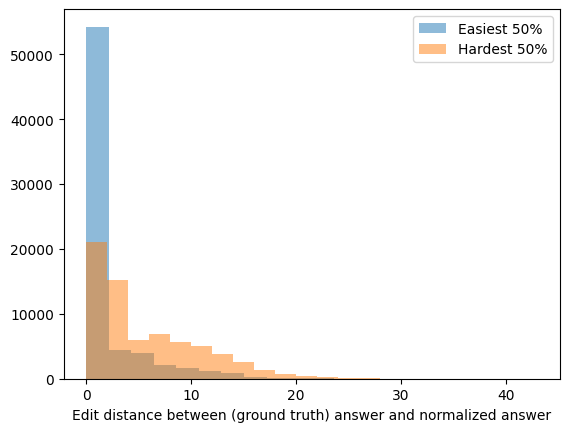

In [72]:
easy_idxs = np.where(train_likelihoods > percentile_threshold)[0]
hard_idxs = np.where(train_likelihoods <= percentile_threshold)[0]

plt.hist(editdistances[easy_idxs], bins=20, alpha=0.5, label="Easiest 50%")
plt.hist(editdistances[hard_idxs], bins=20, alpha=0.5, label="Hardest 50%")
plt.xlabel("Edit distance between (ground truth) answer and normalized answer")

plt.legend()

In [4]:
accuracy1 = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_hard_25/checkpoint_10000/hf_model/test_answers_correct_unnormalized.npy")).mean()
print(accuracy1)
accuracy2 = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_hard_25/checkpoint_10000/hf_model/test_answers_correct.npy")).mean()
print(accuracy2)
accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_hard_25/checkpoint_10000/hf_model/test_answers_correct_unnormalized_sampled.npy")).mean()
print(accuracy)
print(accuracy2-accuracy1)
print(accuracy1-accuracy)

0.4254904146232724
0.5609674543022738
0.27513374944271063
0.13547703967900138
0.1503566651805618


In [13]:
accuracy

0.4254904146232724

In [18]:
accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_hard_25/checkpoint_10000/hf_model/test_answers_correct_unnormalized_sampled.npy")).mean()
print(accuracy)

0.27513374944271063


In [7]:
accuracy2 = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_easy_75/checkpoint_04000/hf_model/test_answers_correct_unnormalized.npy")).mean()
print(accuracy2)

accuracy1 = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_easy_75/checkpoint_04000/hf_model/test_answers_correct.npy")).mean()
print(accuracy1)

accuracy = (np.load(f"ckpts/sft_triviaqa_llama7B_subsample_easy_75/checkpoint_04000/hf_model/test_answers_correct_unnormalized_sampled.npy")).mean()
print(accuracy)

print(accuracy1 - accuracy2)

print(accuracy2 - accuracy)

0.5946834596522514
0.6401582701738743
0.5690481497993758
0.04547481052162283
0.025635309852875654
